# Application of unsupervised learning

## 1. Presentation of the dataset

We chose the dataset "Beer Reviews from Beer Advocate (1.5 Million)" from Kaggle ([https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate](https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate)). This dataset consist of 1.5 millions beer reviews from *Beer Advocate* ([https://www.beeradvocate.com/](https://www.beeradvocate.com/)).
The dataset contains the following features:
- **brewery_id** : ID of the brewery that made the beer
- **brewery_name** : name of the brewery that made the beer
- **review_time** : date and time of the review
- **review_overall** : reviewer's overall rating of the beer on a scale from 0 to 5
- **review_aroma** : reviewer's rating of the beer's aroma on a scale from 0 to 5
- **review_appearance** : reviewer's rating of the beer's appearance on a scale from 0 to 5
- **review_profilename** : reviewer's username
- **beer_style** : style of the beer (ex: IPA, American Pale Ale, etc.)
- **review_palate** : reviewer's rating of the beer's palate on a scale from 0 to 5 (palate = the feel of the beer in the mouth)
- **review_taste** : reviewer's rating of the beer's taste on a scale from 0 to 5
- **beer_name** : name of the beer
- **beer_abv** : alcohol by volume of the beer

## 2. Problem definition

The problem we are trying to solve is to group beers based on the reviews and the alcohol by volume to make a beer recommender system. By clustering the beers, we aim to identify the beers that are similar to each other and recommend them to the users.

We will use the following features to cluster the beers:
- **beer_style**
- **beer_abv**
- **review_overall**
- **review_aroma**
- **review_appearance**
- **review_palate**
- **review_taste**
- **review_profilename**

The problem we are solving would be interesting or have a value for an industry because it would allow to recommend beers to the users based on their preferences. This could be used by a beer company or bars to recommend beers to the users based on their preferences and the beers they have already tried.



## 3. Data loading and analysis

### Loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install opendatasets


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


We are downloading the dataset from Kaggle using the `opendatasets` library as the dataset is too big to be uploaded on GitHub. 

In [7]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate")

Skipping, found downloaded files in "./1-5-million-beer-reviews-from-beer-advocate" (use force=True to force download)


In [10]:
data = pd.read_csv('1-5-million-beer-reviews-from-beer-advocate/beer_reviews.csv')
# data = pd.read_csv('/content/1-5-million-beer-reviews-from-beer-advocate/beer_reviews.csv')
data.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Analysis of the dataset

#### Descriptive statistics

We will start by analyzing the descriptive statistics of the dataset. We will look at the mean, standard deviation, minimum, maximum, and quartiles of the review and abv features in the dataset.

In [11]:
only_reviews_and_abv = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
print(data[only_reviews_and_abv].describe())

       review_overall  review_aroma  review_appearance  review_palate  \
count    1.586614e+06  1.586614e+06       1.586614e+06   1.586614e+06   
mean     3.815581e+00  3.735636e+00       3.841642e+00   3.743701e+00   
std      7.206219e-01  6.976167e-01       6.160928e-01   6.822184e-01   
min      0.000000e+00  1.000000e+00       0.000000e+00   1.000000e+00   
25%      3.500000e+00  3.500000e+00       3.500000e+00   3.500000e+00   
50%      4.000000e+00  4.000000e+00       4.000000e+00   4.000000e+00   
75%      4.500000e+00  4.000000e+00       4.000000e+00   4.000000e+00   
max      5.000000e+00  5.000000e+00       5.000000e+00   5.000000e+00   

       review_taste      beer_abv  
count  1.586614e+06  1.518829e+06  
mean   3.792860e+00  7.042387e+00  
std    7.319696e-01  2.322526e+00  
min    1.000000e+00  1.000000e-02  
25%    3.500000e+00  5.200000e+00  
50%    4.000000e+00  6.500000e+00  
75%    4.500000e+00  8.500000e+00  
max    5.000000e+00  5.770000e+01  


We analyzed the descriptive statistics of the numerical features in the dataset. We can see that the mean overall rating is **3.8**, the mean aroma rating is **3.7**, the mean appearance rating is **3.8**, the mean palate rating is **3.7**, the mean taste rating is **3.8**, and the mean alcohol by volume is **7.0**. The highest alcohol by volume is **57.7%** and the lowest alcohol by volume is **0.0%**.


#### Number of missing values

In [38]:
data.isnull().sum()

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

The dataset contains missing values in the **review_profilename**, **beer_abv** and **brewery_name** columns. We will drop the rows with missing values in the **review_profilename**, **beer_abv** and **brewery_name** columns later in the preprocessing of the date.

#### Number of unique values

In [13]:
data.nunique()

index                 1586614
brewery_id               5840
brewery_name             5742
review_time           1577960
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64

The dataset contains **1,543** unique breweries, **104** unique beer styles, and **57,731** unique beers. The dataset contains **33,996** unique reviewers.

#### Distribution of the features

##### Number of beers per style

In [14]:
nb_beers_by_style = data.groupby('beer_style')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_style.head(10))

beer_style
American IPA                      3167
American Pale Ale (APA)           2887
American Amber / Red Ale          2231
American Porter                   1839
Fruit / Vegetable Beer            1604
Euro Pale Lager                   1441
American Double / Imperial IPA    1435
English Bitter                    1418
Hefeweizen                        1404
German Pilsener                   1270
Name: beer_name, dtype: int64


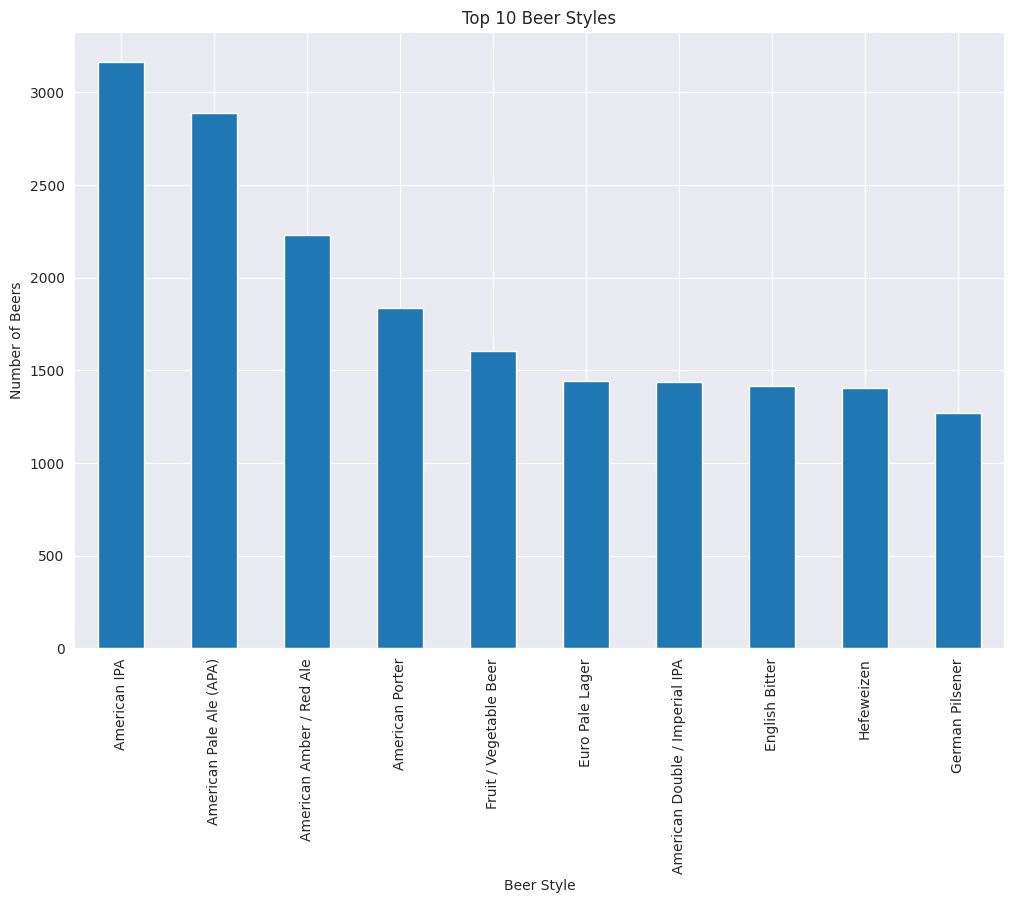

In [15]:
# Plot the top 10 beer styles
plt.figure(figsize=(12, 8))
nb_beers_by_style.head(10).plot(kind='bar')
plt.title('Top 10 Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Number of Beers')

plt.show()

##### Number of beers per brewery

In [16]:
nb_beers_by_brewery= data.groupby('brewery_name')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_brewery.head(10))

brewery_name
Rock Bottom Restaurant & Brewery      868
John Harvard's Brewery & Ale House    394
Goose Island Beer Co.                 368
Iron Hill Brewery & Restaurant        316
Minneapolis Town Hall Brewery         312
Port Brewing Company / Pizza Port     283
Cigar City Brewing                    201
Mikkeller ApS                         185
Kuhnhenn Brewing Company              177
Sly Fox Brewing Company               163
Name: beer_name, dtype: int64


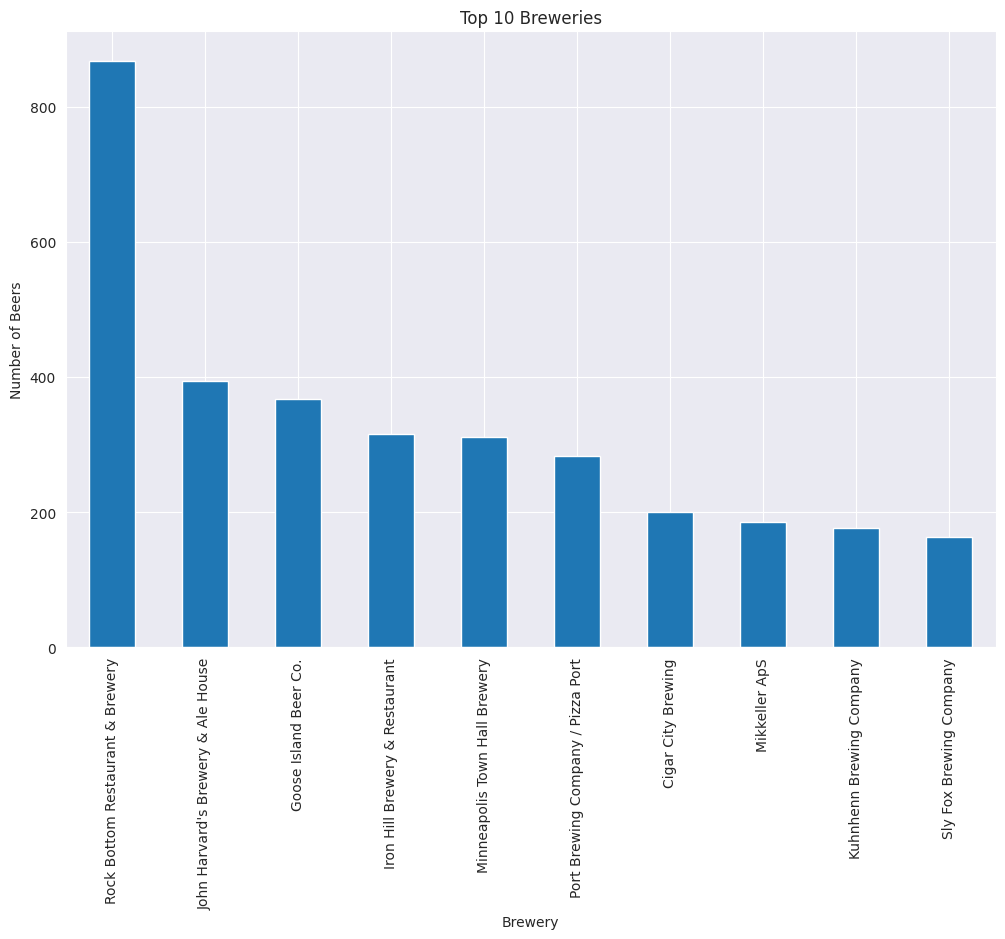

In [17]:
# Plot the top 10 breweries
plt.figure(figsize=(12, 8))
nb_beers_by_brewery.head(10).plot(kind='bar')
plt.title('Top 10 Breweries')
plt.xlabel('Brewery')
plt.ylabel('Number of Beers')
plt.show()

##### Distribution of ratings

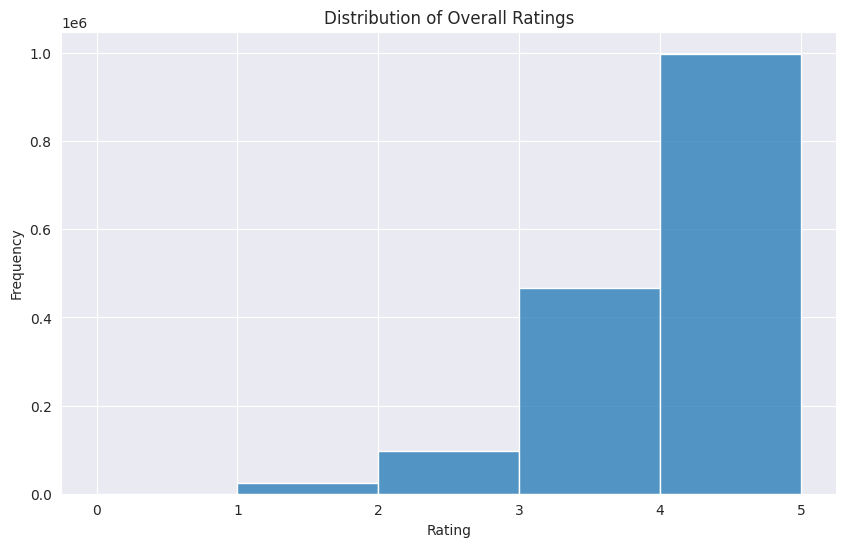

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_overall'], bins=5)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

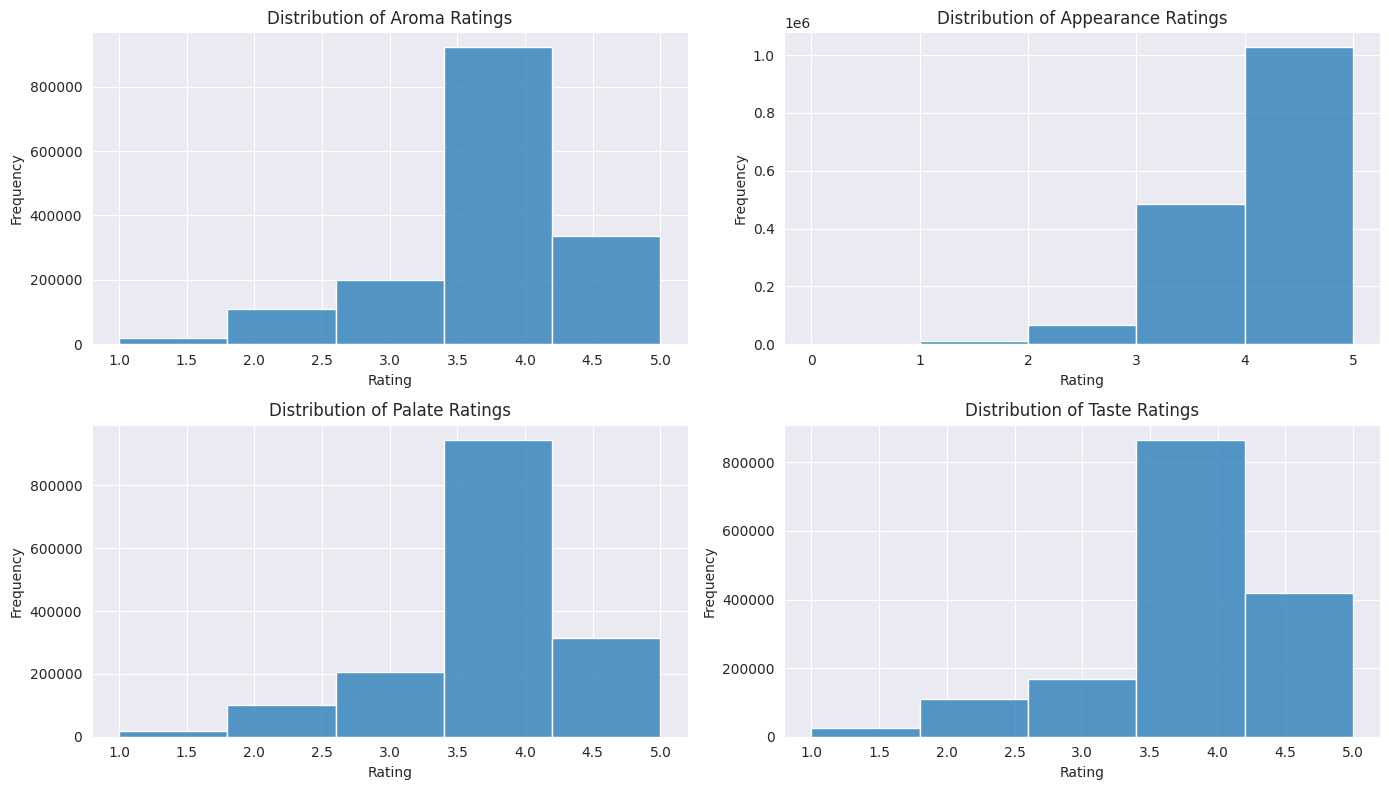

In [19]:
numerical_columns = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns):
    name = column.split('_')[-1].capitalize()
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], bins=5)
    plt.title(f'Distribution of {name} Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Outliers detection

##### Box plot of overall ratings

We used box plots to detect outliers in the overall ratings.

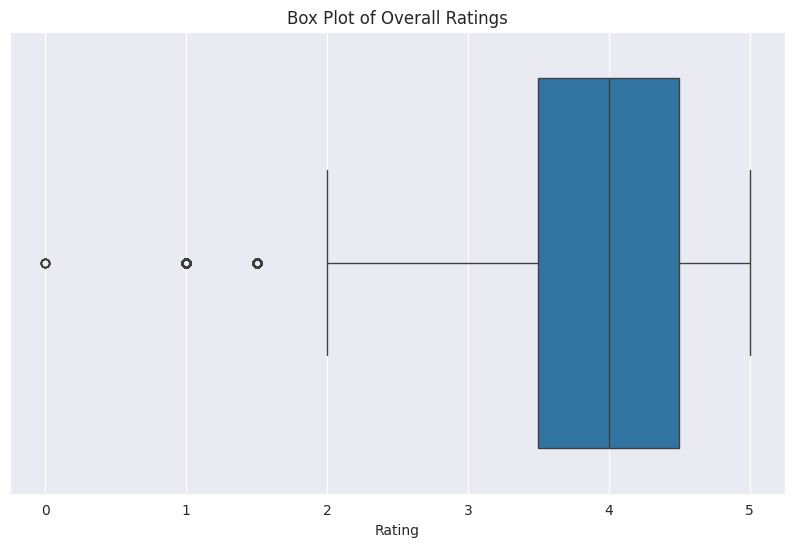

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['review_overall'])
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Rating')
plt.show()

We can see that the overall ratings are distributed between 2 and 5 with a median of 4. We can see  outliers in the overall ratings below 2.

##### Box plot of other ratings

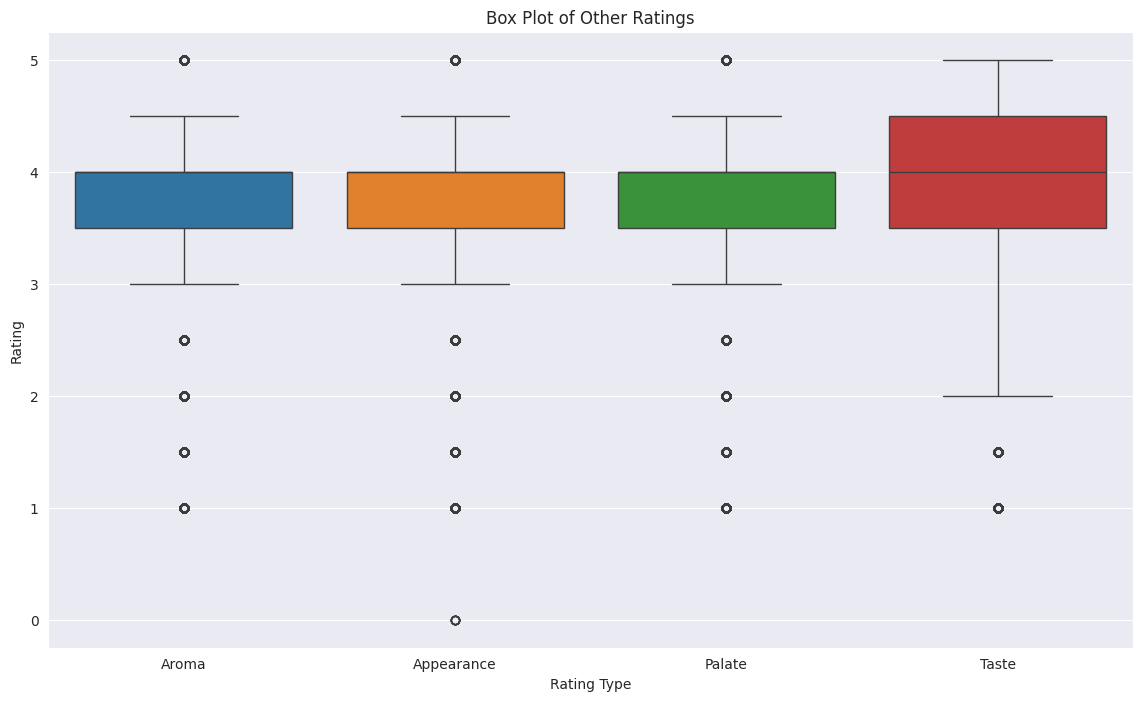

In [26]:
numerical_columns_name = ['Aroma', 'Appearance', 'Palate', 'Taste']
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Other Ratings')
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.xticks(ticks=[0, 1, 2, 3], labels=numerical_columns_name)
plt.show()

We can see that the aroma, appearance and palate ratings are distributed between  and 4.5. We can see outliers in the aroma, appearance and palate ratings below  3 and upper 4.5. The taste ratings are distributed between 2 and 5 with a median of 4. We can see outliers in the taste ratings below 2.

#### Correlation matrix

In [29]:
correlation_matrix = data[only_reviews_and_abv].corr()
print(correlation_matrix)

                   review_overall  review_aroma  review_appearance  \
review_overall           1.000000      0.616013           0.501732   
review_aroma             0.616013      1.000000           0.561029   
review_appearance        0.501732      0.561029           1.000000   
review_palate            0.701914      0.616947           0.566634   
review_taste             0.789816      0.716776           0.546980   
beer_abv                 0.138512      0.332570           0.263941   

                   review_palate  review_taste  beer_abv  
review_overall          0.701914      0.789816  0.138512  
review_aroma            0.616947      0.716776  0.332570  
review_appearance       0.566634      0.546980  0.263941  
review_palate           1.000000      0.734135  0.286711  
review_taste            0.734135      1.000000  0.290827  
beer_abv                0.286711      0.290827  1.000000  


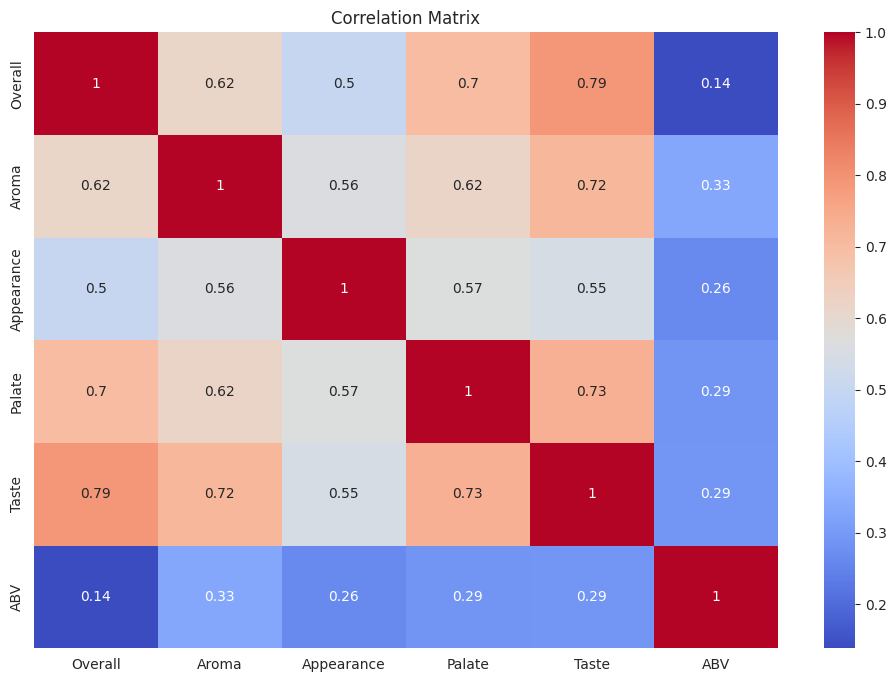

In [36]:
only_reviews_and_abv_name = ['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste', 'ABV']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=only_reviews_and_abv_name, yticklabels=only_reviews_and_abv_name)
plt.title('Correlation Matrix')
plt.show()


With this correlation matrix, we can see that there is a high correlation between the overall rating and the taste rating (0.79), the palate rating and the taste rating (0.73), the aroma rating and the taste rating (0.72) and the overall rating and the palate rating (0.7). We can see that there is a low correlation between the alcohol by volume and the other ratings.

#### Reviewers data analysis

##### Number of reviews per reviewer

In [58]:
nb_reviews_per_reviewer = data.groupby('review_profilename')['beer_name'].count().sort_values(ascending=False)
print(nb_reviews_per_reviewer.head(10))

review_profilename
northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
NeroFiddled       3488
ChainGangGuy      3471
brentk56          3357
Phyl21ca          3179
WesWes            3168
Name: beer_name, dtype: int64


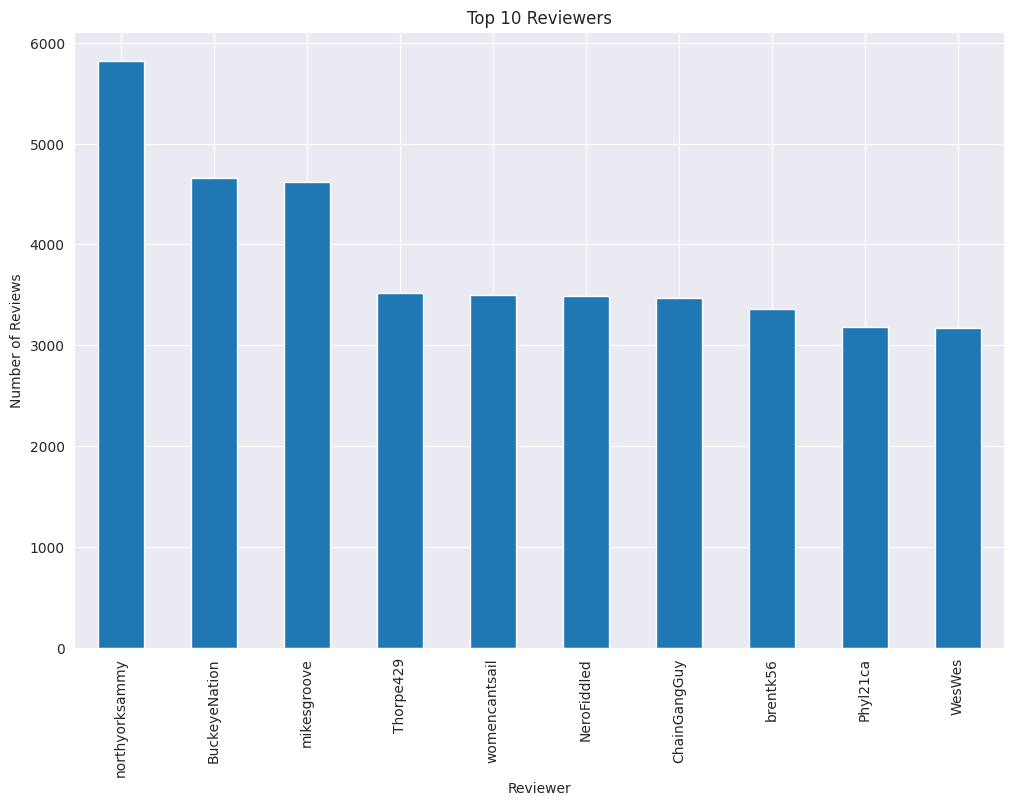

In [59]:
plt.figure(figsize=(12, 8))
nb_reviews_per_reviewer.head(10).plot(kind='bar')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.show()

##### Distribution of the number of reviews per reviewer

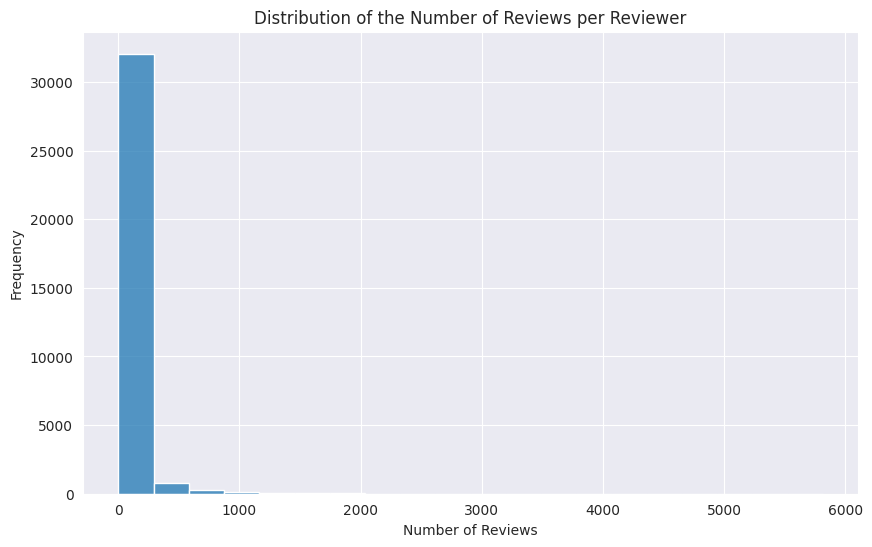

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(nb_reviews_per_reviewer, bins=20)
plt.title('Distribution of the Number of Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

##### Number of reviewers per beer

In [63]:
nb_reviewers_per_beer = data.groupby('beer_name')['review_profilename'].nunique().sort_values(ascending=False)
print(nb_reviewers_per_beer.head(10))

beer_name
90 Minute IPA                          3206
Old Rasputin Russian Imperial Stout    3038
Sierra Nevada Celebration Ale          2929
Stone Ruination IPA                    2644
Arrogant Bastard Ale                   2633
Two Hearted Ale                        2631
Sierra Nevada Pale Ale                 2526
Stone IPA (India Pale Ale)             2526
La Fin Du Monde                        2480
Duvel                                  2448
Name: review_profilename, dtype: int64


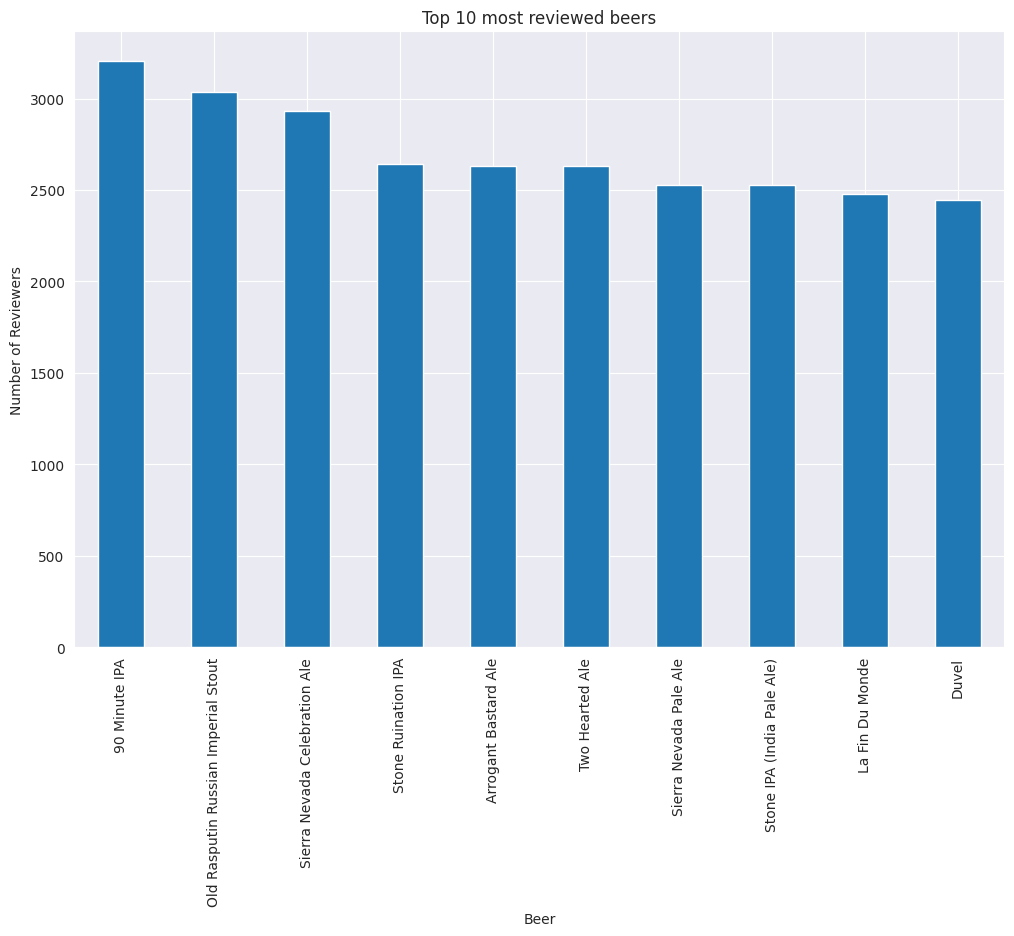

In [65]:
plt.figure(figsize=(12, 8))
nb_reviewers_per_beer.head(10).plot(kind='bar')
plt.title('Top 10 most reviewed beers')
plt.xlabel('Beer')
plt.ylabel('Number of Reviewers')
plt.show()

##### Distribution of the number of reviewers per beer

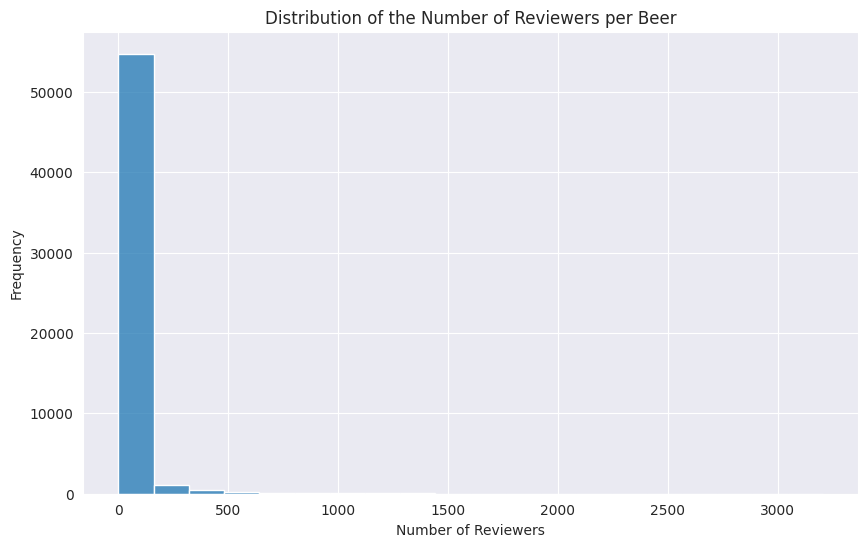

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(nb_reviewers_per_beer, bins=20)
plt.title('Distribution of the Number of Reviewers per Beer')
plt.xlabel('Number of Reviewers')
plt.ylabel('Frequency')
plt.show()

## 4. Data preprocessing

### Dropping missing values

In [82]:
preprocessed_data = data.dropna()
print("Number of rows before dropping missing values:", data.shape[0])
print("Number of rows after dropping missing values:", preprocessed_data.shape[0])
print("Number of dropped rows:", data.shape[0] - preprocessed_data.shape[0])
preprocessed_data.isnull().sum()

Number of rows before dropping missing values: 1586614
Number of rows after dropping missing values: 1518478
Number of dropped rows: 68136


index                 0
brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

### Dropping duplicates

In [83]:
preprocessed_data = preprocessed_data.drop_duplicates()
print("Number of rows before dropping duplicates:", data.shape[0])
print("Number of rows after dropping duplicates:", preprocessed_data.shape[0])

Number of rows before dropping duplicates: 1586614
Number of rows after dropping duplicates: 1518478


### Selecting the relevant features columns for clustering

In [84]:
features = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'review_profilename', 'beer_style']
X = preprocessed_data[features]
X.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,review_profilename,beer_style
0,1.5,2.0,2.5,1.5,1.5,5.0,stcules,Hefeweizen
1,3.0,2.5,3.0,3.0,3.0,6.2,stcules,English Strong Ale
2,3.0,2.5,3.0,3.0,3.0,6.5,stcules,Foreign / Export Stout
3,3.0,3.0,3.5,2.5,3.0,5.0,stcules,German Pilsener
4,4.0,4.5,4.0,4.0,4.5,7.7,johnmichaelsen,American Double / Imperial IPA


### Changing the data type of the string column

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
label_encoder = LabelEncoder()
X.loc[:, 'review_profilename'] = label_encoder.fit_transform(X['review_profilename'])
X.loc[:, 'beer_style'] = label_encoder.fit_transform(X['beer_style'])
X.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,review_profilename,beer_style
0,1.5,2.0,2.5,1.5,1.5,5.0,30121,65
1,3.0,2.5,3.0,3.0,3.0,6.2,30121,51
2,3.0,2.5,3.0,3.0,3.0,6.5,30121,59
3,3.0,3.0,3.5,2.5,3.0,5.0,30121,61
4,4.0,4.5,4.0,4.0,4.5,7.7,22693,9


### Scaling the features

We will scale the features to have a mean of 0 and a standard deviation of 1. It is important to scale the features before clustering because the features have different scales and clustering algorithms are sensitive to the scales of the features.

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,review_profilename,beer_style
0,-3.239994,-2.511302,-2.198210,-3.317561,-3.162309,-0.879410,1.48227,0.689591
1,-1.148720,-1.792233,-1.384289,-1.109519,-1.103587,-0.362740,1.48227,0.265833
2,-1.148720,-1.792233,-1.384289,-1.109519,-1.103587,-0.233573,1.48227,0.507981
3,-1.148720,-1.073164,-0.570368,-1.845533,-1.103587,-0.879410,1.48227,0.568518
4,0.245463,1.084042,0.243553,0.362510,0.955134,0.283097,0.70644,-1.005440


We scaled only the numerical features and not the categorical features because the categorical features are already encoded and have a range between 0 and the number of unique values.

### Principal Component Analysis (PCA)

We performed a principal component analysis (PCA) to reduce the dimensionality of the dataset. PCA is useful before performing k-means because it helps with the computation time and th inertia of the k-means algorithm. 

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio: [0.45924736 0.12944072 0.12496425 0.11027703 0.06851819 0.04892491
 0.03541537 0.02321218]
Cumulative explained variance: [0.45924736 0.58868808 0.71365233 0.82392935 0.89244755 0.94137245
 0.97678782 1.        ]


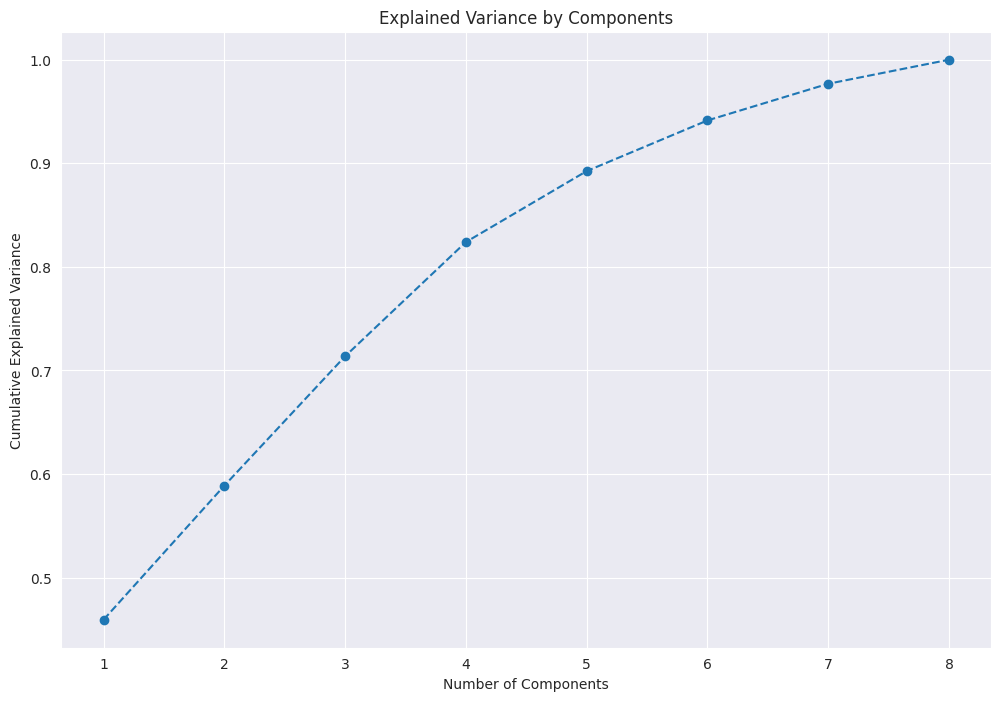

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, X_scaled.shape[1]+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [92]:
desired_variance = 0.95
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance*100}% of the variance:", n_components)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Number of components to explain 95.0% of the variance: 7


## 5. Clustering

### K-means clustering with silhouette score

We will use the k-means algorithm to cluster the beers. We will use the silhouette score to evaluate the quality of the clusters. The silhouette score is a metric that measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### With all the preprocessing steps (scaling, PCA)

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [94]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=100)
    kmeans.fit(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    

print(f"Best silhouette score: {max(silhouette_scores)} for k={silhouette_scores.index(max(silhouette_scores))+2}")

/home/florinekieraga/Desktop/EPITA/Ing2/FTML/FTML_project/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 